In [1]:
# https://bastings.github.io/annotated_encoder_decoder/
import os
import numpy as np
import pandas as pd
import pickle
from functools import reduce
from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem.lancaster import LancasterStemmer
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append(os.path.join(os.getcwd(),os.pardir))

from recipe_gen.seq2seq_utils import Vocabulary, FOLDER_PATH,DATA_FILES

In [2]:
with open(os.path.join(FOLDER_PATH,DATA_FILES[3]),'rb') as f:
    vocab_ingrs=pickle.load(f)

with open(os.path.join(FOLDER_PATH,DATA_FILES[4]),'rb') as f:
    vocab_toks=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[0]),'rb') as f:
    ingrs_count=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[1]),'rb') as f:
    tokens_count=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[5]),'rb') as f:
    recipes=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[2]),'rb') as f:
    recipes_test=pickle.load(f)

with open(os.path.join(FOLDER_PATH,"recipe1m_val.pkl"),'rb') as f:
    recipes_val=pickle.load(f)

In [3]:
len(recipes_test)

57570

In [3]:
len(recipes_val)

57500

In [4]:
len(recipes)

268012

In [5]:
len(vocab_toks)

16373

In [4]:
recipes_pd=pd.DataFrame(recipes).T
recipes_pd = recipes_pd.reset_index()
recipes_pd

,index,ingredients,instructions,title,tokenized
0,000033e39b,"[(elbow_macaroni, (None, None, None, None), Fa...",[cook macaroni according to package directions...,"[dilly, macaroni, salad, recipe]","[[cook, macaroni, according, to, package, dire..."
1,000035f7ed,"[(tomato, (None, None, None, None), True), (ko...",[add the tomatoes to a food processor with a p...,[gazpacho],"[[add, the, tomatoes, to, a, food, processor, ..."
2,00004320bb,"[(watermelon_gelatin, (None, None, None, None)...","[dissolve jello in boiling water, allow to coo...","[cool, ', n, easy, creamy, watermelon, pie]","[[dissolve, jello, in, boiling, water], [allow..."
3,000075604a,"[(chicken_thigh, (None, None, None, None), Tru...",[pierce the skin of the chicken with a fork or...,"[kombu, tea, grilled, chicken, thigh]","[[pierce, the, skin, of, the, chicken, with, a..."
4,0000c79afb,"[(rose_wine, (None, None, None, None), False),...","[in a pitcher, combine all the ingredients exc...","[pink, sangria]","[[in, a, pitcher, ,, combine, all, the, ingred..."
5,0000ed95f8,"[(butter, (None, None, None, None), False), (b...","[cream butter, sugar and egg, add orange juice...","[pineapple, loaf]","[[cream, butter, ,, sugar, and, egg], [add, or..."
6,00013266c9,"[(salted_butter, (None, None, None, None), Fal...",[preheat oven to 350 degrees f rack in middle ...,"[tinklee, 's, vanilla, crack]","[[preheat, oven, to, 350, degrees, f, rack, in..."
7,00015b5a39,"[(potato, (None, None, None, None), True), (re...","[peel the potatoes and quarter, add all ingred...","[erin, 's, mashed, potatoes]","[[peel, the, potatoes, and, quarter], [add, al..."
8,00016355e6,"[(vanilla_wafer_cookie, (None, None, None, Non...","[place vanilla wafer cookie in a baggie, seal ...","[banana, cream, pie, smoothie]","[[place, vanilla, wafer, cookie, in, a, baggie..."
9,00016d71a4,"[(graham_wafer, (None, None, None, None), True...","[line the bottom of a 9"" (25l) square pan with...","[frosty, lemon, ice, cream, sandwiches]","[[line, the, bottom, of, a, 9, '', (, 25l, ), ..."


In [5]:
tokens_count.most_common(30)

[(',', 872585),
 ('and', 868938),
 ('the', 697706),
 ('in', 462918),
 ('a', 419370),
 ('to', 383685),
 ('with', 328730),
 ('until', 242059),
 ('add', 207742),
 ('of', 195211),
 ('for', 192455),
 ('minutes', 176309),
 ('or', 161579),
 ('on', 148529),
 ('into', 142290),
 ('heat', 138817),
 ('salt', 132709),
 ('over', 119320),
 ('mix', 118531),
 ('butter', 116596),
 ('sugar', 106860),
 (';', 102878),
 ('water', 101004),
 ('bowl', 97235),
 ('stir', 96783),
 ('cook', 93196),
 ('cheese', 92526),
 ('place', 85034),
 ('mixture', 84662),
 (')', 83594)]

In [6]:
# Average nb of ingredients per recipes
reduce((lambda x,value: x+len(value["ingredients"])),recipes.values(),0)/len(recipes)

6.586701341730968

In [47]:
# Average nb of steps per recipes
reduce((lambda x,value: x+len(value["instructions"])),recipes.values(),0)/len(recipes)

6.114748593346566

In [50]:
total_words = 0
words_instr = 0
for recipe in recipes.values():
    temp_instr = 0
    for step in recipe["tokenized"]:
        total_words+=len(step)
        temp_instr+=len(step)
    words_instr+=temp_instr/len(recipe["tokenized"])
print(words_instr/len(recipes),total_words/len(recipes))

11.146189043241264 68.04753518499172


In [67]:
#mention ingr in step
st = LancasterStemmer()
mention_rec = 0
mention_step = 0
for recipe in recipes.values():
    
    mentioned = []
    
    for step in recipe["tokenized"]:
        mention=False
        mentioned.append([])
        for word in step:
            if st.stem(word) in vocab_ingrs.word2idx:
                mentioned[-1].append(st.stem(word) )
                mention=True
        #TODO: make it coherent with way of counting in eval gen recipes
        # stem there too ?
        
    tot_ment = reduce((lambda x,step: x+len(step)),mentioned,0)
    mention_rec += tot_ment
    mention_step += tot_ment/len(recipe["tokenized"])
    #print(mentioned,tot_ment,tot_ment/len(recipe["tokenized"]))

print(mention_rec/len(recipes))
print(mention_step/len(recipes))

4.130557586973717
0.6865965001211882


In [53]:
ingrs_count = Counter(ingrs_count)
ingrs_count.most_common(20)

[('pepper', 80604),
 ('sugar', 73305),
 ('cheese', 69508),
 ('salt', 68973),
 ('oil', 57823),
 ('butter', 56585),
 ('onion', 55849),
 ('egg', 42971),
 ('juice', 38124),
 ('water', 37836),
 ('milk', 37298),
 ('flour', 30763),
 ('cream', 29263),
 ('clove', 28589),
 ('tomato', 22532),
 ('vinegar', 18367),
 ('chicken', 18191),
 ('garlic', 15707),
 ('potato', 14225),
 ('cinnamon', 13458)]

In [8]:
ingrs_count

Counter({'macaroni': 1551,
         'cheese': 69508,
         'celery': 5694,
         'pepper': 80604,
         'pimento': 281,
         'mayonnaise': 12252,
         'vinegar': 18367,
         'salt': 68973,
         'dill': 3438,
         'tomato': 22532,
         'onion': 55849,
         'cucumber': 4187,
         'oil': 57823,
         'basil': 8304,
         'gelatin': 2341,
         'water': 37836,
         'cool_whip': 3127,
         'watermelon': 786,
         'cracker': 5284,
         'chicken': 18191,
         'tea': 1495,
         'wine': 6717,
         'brandy': 1305,
         'liqueur': 2736,
         'juice': 38124,
         'orange': 7546,
         'lemon': 11523,
         'sprite': 241,
         'ice': 6615,
         'butter': 56585,
         'sugar': 73305,
         'extract': 11567,
         'nut': 4098,
         'potato': 14225,
         'teriyaki_sauce': 505,
         'garlic': 15707,
         'cream': 29263,
         'cookie': 1981,
         'banana': 5961,
      

In [9]:
len(vocab_ingrs.word2idx)-4 #remove spe tok

11239

In [10]:
len(vocab_ingrs.idx2word)- 4 #remove spe toks, nb clusters

996

In [11]:
# Most used ingredients by cluster
cluster_count={}
for k in vocab_ingrs.idx2word.keys():
    cluster_count[k]=reduce(lambda x,value: x+ingrs_count[value],vocab_ingrs.idx2word[k],0)
sorted_cluster = sorted(vocab_ingrs.idx2word.items(), key=lambda kv: cluster_count[kv[0]],reverse=True)
[(x[0],x[1][:5],cluster_count[x[0]]) for x in sorted_cluster]

[(7,
  ['green_pepper',
   'green_bell_pepper',
   'red_bell_pepper',
   'yellow_bell_pepper',
   'white_pepper'],
  80604),
 (34,
  ['granulated_sugar',
   'coarse_sugar',
   'brown_sugar',
   'splenda_sugar_substitute',
   "confectioner's_sugar"],
  73305),
 (5,
  ['american_cheese',
   'cream_cheese',
   'shredded_cheddar_cheese',
   'cheese',
   'philadelphia_cream_cheese'],
  69508),
 (11,
  ['salt', 'kosher_salt', 'garlic_salt', 'onion_salt', 'pickling_salt'],
  68973),
 (16,
  ['olive_oil', 'oil', 'extra_virgin_olive_oil', 'corn_oil', 'sesame_oil'],
  57823),
 (33,
  ['salted_butter',
   'butter',
   'natural_-_style_peanut_butter',
   'creamy_peanut_butter',
   'unsalted_butter'],
  56585),
 (14,
  ['red_onion',
   'dried_onion_flake',
   'green_onion',
   'french_-_fried_onion',
   'onion'],
  55849),
 (51,
  ['egg', 'egg_substitute', 'chocolate_egg', 'egg_white', 'egg_yolk'],
  42971),
 (28,
  ['white_cranberry_juice',
   'orange_juice',
   'cranberry_juice',
   'lemon_juice'

In [12]:
# Average cluster size
reduce(lambda x,value: x+len(value),vocab_ingrs.idx2word.values(),0)/len(vocab_ingrs.idx2word.keys())

11.259

In [13]:
vocab_ingrs.idx2word.values()

dict_values(['<pad>', '<sos>', '<eos>', '<unk>', ['elbow_macaroni', 'macaroni', 'macaroni_cheese_mix', 'cooked_macaroni', 'wheat_elbow_macaroni', 'macaroni_&_cheese_dinner_mix', 'hamburger_helper_cheeseburger_macaroni', 'cooked_salad_macaroni', 'wagon_wheel_macaroni', 'shell_macaroni', 'wheat_macaroni', 'cooked_elbow_macaroni', 'small_elbow_macaroni', 'corkscrew_macaroni', 'dry_pasta_shell_macaroni', 'salad_macaroni', 'cooked_corkscrew_macaroni', 'tri_-_colored_corkscrew_macaroni', 'macaroni_white_cheddar_cheese_mix', 'hamburger_helper_lasagna_macaroni'], ['american_cheese', 'cream_cheese', 'shredded_cheddar_cheese', 'cheese', 'philadelphia_cream_cheese', 'proces_american_cheese', 'cottage_cheese', 'parmesan_cheese', 'kraft_shredded_parmesan_cheese', 'cheddar_cheese', 'fat_-_free_cheddar_cheese', 'low_fat_cottage_cheese', 'swiss_cheese', 'lowfat_large_curd_cottage_cheese', 'fat_-_free_cottage_cheese', 'low_-_fat_cheddar_cheese', 'parmigiano_-_reggiano_cheese', 'pecorino_romano_cheese',

In [14]:
# Biggest cluster size
sorted_cluster_size = sorted(vocab_ingrs.idx2word.items(), key=lambda kv: len(kv[1]),reverse=True)
[(x[0],x[1][:5],len(x[1])) for x in sorted_cluster_size[:10]]

[(5,
  ['american_cheese',
   'cream_cheese',
   'shredded_cheddar_cheese',
   'cheese',
   'philadelphia_cream_cheese'],
  413),
 (28,
  ['white_cranberry_juice',
   'orange_juice',
   'cranberry_juice',
   'lemon_juice',
   'apple_juice'],
  187),
 (7,
  ['green_pepper',
   'green_bell_pepper',
   'red_bell_pepper',
   'yellow_bell_pepper',
   'white_pepper'],
  182),
 (137,
  ['condensed_cream_chicken_soup',
   'cream_chicken_soup',
   'cream_mushroom_soup',
   'condensed_cream_mushroom_soup',
   'soup_mix'],
  178),
 (160,
  ['kidney_bean',
   'long_bean',
   'vanilla_bean',
   'french_style_green_bean',
   'great_northern_bean'],
  173),
 (53,
  ['maple_syrup',
   'light_corn_syrup',
   'hershey_syrup',
   'pure_maple_syrup',
   'corn_syrup'],
  171),
 (49,
  ['cinnamon_-_swirl_bread',
   'focaccium_bread',
   'bread',
   'wheat_bread',
   'pumpernickel_bread'],
  149),
 (23,
  ['chicken_thigh',
   'boneles_skinles_chicken_breast',
   'chicken_breast',
   'chicken',
   'chicken_dr

In [15]:
def checkIngrInRecipe(cur,recipe):
    for ingr in recipe["ingredients"]:
        if cur in ingr.name:
            return True
    return False

In [16]:
for recipe in recipes.values():
    if checkIngrInRecipe("lamb", recipe) and checkIngrInRecipe("mint", recipe):
        print(" ".join(recipe["title"]))

lamb chops with mint-fig sauce
grilled lamb chops with ladolemono
chili mint rub
skewered kefta
lamb with mint sauce
mint glazed rack of lamb for one
real shepherd 's pie
thyme and feta lamb
grilled sausages with figs and mixed greens
broiled lamb chops with mint pesto
lamb sandwich
grilled lamb chops with fresh mango chutney
lamb and feta burgers recipe
arabian lamb casserole recipe
lamb chops with yogurt-mint sauce
grilled lamb with horseradish-mint sauce
greek-style lamb burgers with yogurt-cucumber sauce
greek potato lamb meatballs
minted lemon lamb
greek lamb koftas
minted lamb shanks
roast leg of lamb-armenian style !
double lamb chops with ginger-mint crust
nita 's lamb , green beans and tomatoes
garlic lamb chops
roasted lamb sausages with grape-mint relish recipe
minted lamb chops - slow cooker
lamb and apricot stew
grilled spring lamb chops ( from fwdgf )
roasted leg of lamb
feta lamb burgers with cucumber-tomato salad
kafta snoober ( lamb burgers with pine nuts )
mandarin la

In [17]:
recipes_pd.loc[104,"ingredients"][0]

Ingredient(name='watermelon', amount=(None, None, None, None), plural=False)

In [18]:
recipes_pd["nb_ingrs"]=[len(x) for x in recipes_pd["ingredients"]]
recipes_pd["nb_instr"]=[len(x) for x in recipes_pd["instructions"]]    

In [19]:
recipes_pd[recipes_pd["nb_ingrs"]>20]["ingredients"]

79494     [(water, (None, None, None, None), False), (eg...
167327    [(nonfat_milk, (None, None, None, None), False...
177136    [(soymilk, (None, None, None, None), False), (...
233412    [(buttermilk, (None, None, None, None), False)...
246811    [(nonfat_milk, (None, None, None, None), False...
Name: ingredients, dtype: object

In [20]:
recipes_pd[recipes_pd["nb_ingrs"]>20]["ingredients"].at[79494]

[Ingredient(name='water', amount=(None, None, None, None), plural=False),
 Ingredient(name='egg', amount=(None, None, None, None), plural=False),
 Ingredient(name='vegetable_oil', amount=(None, None, None, None), plural=False),
 Ingredient(name='bread_flour', amount=(None, None, None, None), plural=False),
 Ingredient(name='wheat_flour', amount=(None, 'whole', None, 'whole'), plural=False),
 Ingredient(name='dry_buttermilk', amount=(None, None, None, None), plural=False),
 Ingredient(name='dark_brown_sugar', amount=(None, None, None, None), plural=False),
 Ingredient(name='gluten', amount=(None, None, None, None), plural=False),
 Ingredient(name='salt', amount=(None, None, None, None), plural=False),
 Ingredient(name='fast_rising_yeast', amount=(None, None, None, None), plural=False),
 Ingredient(name='water', amount=(None, None, None, None), plural=False),
 Ingredient(name='egg', amount=(None, None, None, None), plural=False),
 Ingredient(name='vegetable_oil', amount=(None, None, None

In [21]:
recipe_filtered = recipes_pd[(recipes_pd["nb_ingrs"]<10) & (recipes_pd["nb_instr"]<10)]
recipe_filtered = recipe_filtered.reset_index()
recipe_filtered

,level_0,index,ingredients,instructions,title,tokenized,nb_ingrs,nb_instr
0,0,000033e39b,"[(elbow_macaroni, (None, None, None, None), Fa...",[cook macaroni according to package directions...,"[dilly, macaroni, salad, recipe]","[[cook, macaroni, according, to, package, dire...",9,8
1,1,000035f7ed,"[(tomato, (None, None, None, None), True), (ko...",[add the tomatoes to a food processor with a p...,[gazpacho],"[[add, the, tomatoes, to, a, food, processor, ...",9,4
2,2,00004320bb,"[(watermelon_gelatin, (None, None, None, None)...","[dissolve jello in boiling water, allow to coo...","[cool, ', n, easy, creamy, watermelon, pie]","[[dissolve, jello, in, boiling, water], [allow...",5,7
3,3,000075604a,"[(chicken_thigh, (None, None, None, None), Tru...",[pierce the skin of the chicken with a fork or...,"[kombu, tea, grilled, chicken, thigh]","[[pierce, the, skin, of, the, chicken, with, a...",3,5
4,4,0000c79afb,"[(rose_wine, (None, None, None, None), False),...","[in a pitcher, combine all the ingredients exc...","[pink, sangria]","[[in, a, pitcher, ,, combine, all, the, ingred...",8,3
5,6,00013266c9,"[(salted_butter, (None, None, None, None), Fal...",[preheat oven to 350 degrees f rack in middle ...,"[tinklee, 's, vanilla, crack]","[[preheat, oven, to, 350, degrees, f, rack, in...",4,5
6,7,00015b5a39,"[(potato, (None, None, None, None), True), (re...","[peel the potatoes and quarter, add all ingred...","[erin, 's, mashed, potatoes]","[[peel, the, potatoes, and, quarter], [add, al...",5,5
7,8,00016355e6,"[(vanilla_wafer_cookie, (None, None, None, Non...","[place vanilla wafer cookie in a baggie, seal ...","[banana, cream, pie, smoothie]","[[place, vanilla, wafer, cookie, in, a, baggie...",8,5
8,9,00016d71a4,"[(graham_wafer, (None, None, None, None), True...","[line the bottom of a 9"" (25l) square pan with...","[frosty, lemon, ice, cream, sandwiches]","[[line, the, bottom, of, a, 9, '', (, 25l, ), ...",5,8
9,10,0001960f61,"[(cinnamon_-_swirl_bread, (None, None, None, N...","[coat a 9x13 baking dish with spray of oil, ar...","[apple, cinnamon, french, toast, strata]","[[coat, a, 9x13, baking, dish, with, spray, of...",7,9


In [43]:
#nx, ny = recipes_pd["nb_ingrs"].max()+1,recipes_pd["nb_instr"].max()+1
minx,miny = recipe_filtered["nb_ingrs"].min(),recipe_filtered["nb_instr"].min()
nx, ny = 11,11
ingr2instrCount=np.zeros((nx,ny))
for i in range(len(recipe_filtered)):
    ingr2instrCount[recipe_filtered.loc[i,"nb_ingrs"],recipe_filtered.loc[i,"nb_instr"]]+=1
ingr2instrCount

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0., 3157., 3233., 2938., 2629., 2033., 1652.,
        1198.,    0.],
       [   0.,    0.,    0., 4753., 5092., 5012., 4613., 4064., 3264.,
        2556.,    0.],
       [   0.,    0.,    0., 5389., 6198., 6675., 6733., 5957., 5033.,
        4177.,    0.],
       [   0.,    0.,    0., 5100., 6013., 7020., 7401., 7046., 6410.,
        5359.,    0.],
       [   0.,    0.,    0., 4103., 5492., 6622., 7434., 7404., 6956.,
        6142.,    0.],
       [   0.,    0.,    0., 3209., 4586., 5865., 6857., 7145., 6951.,
        6450.,    0.],
       [   0.,    0.,    0., 2335., 3410., 4690., 5773., 6355., 6378.,
        6193.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    

<IPython.core.display.Javascript object>


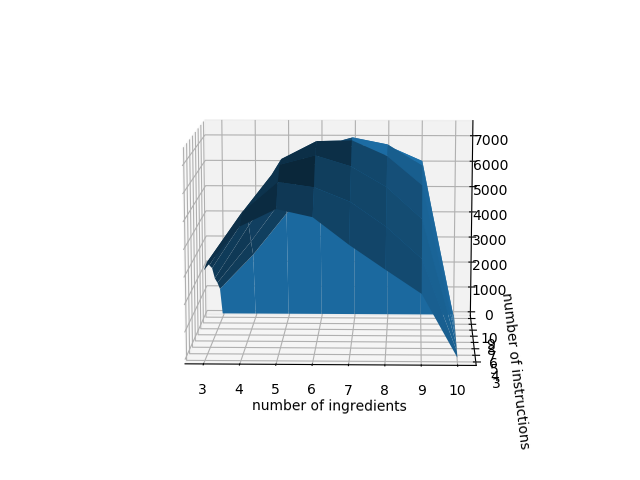

In [46]:
%matplotlib notebook

# Set up grid and test data
x = range(minx,nx)
y = range(miny,ny)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X.T, Y.T, ingr2instrCount[minx:nx,miny:ny])
ha.set_xlabel('number of ingredients')
ha.set_ylabel('number of instructions')

plt.show()